In [34]:
#Importando librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
import random
from timeit import default_timer as timer
from mpl_toolkits.mplot3d import Axes3D 


In [35]:
#la direccion actual se encuentra en ~/CodigosAlejandro/
#Importando datos

datos  = np.loadtxt('data_500.dat', delimiter= ' ')
random = np.loadtxt('rand0_500.dat',delimiter= ' ')
print('número de datos: ', len(datos))
print('número de datos random: ', len(random))

número de datos:  500
número de datos random:  500


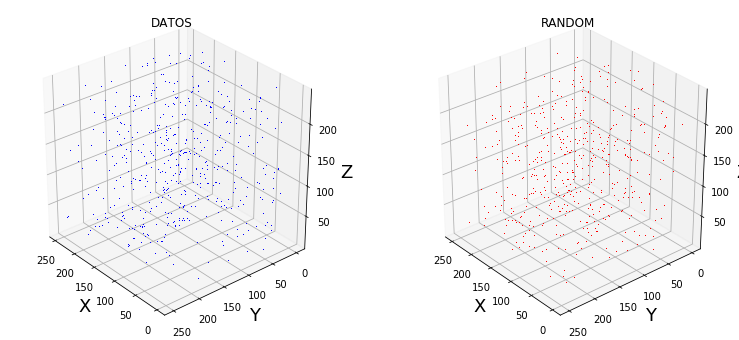

In [36]:
#Visualizando datos
fig = plt.figure(figsize=(13,6))
#subplot(columns, rows, position, projection)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot3D(datos[:,0],datos[:,1],datos[:,2],',b')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('DATOS')
ax.view_init(30, 140)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot3D(random[:,0],random[:,1],random[:,2],',r')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('RANDOM')
ax.view_init(30, 140)

plt.show()

In [37]:
#eliminando la 4 columna de ambos arrays de datos (estos objets ya son arrays de numpy desde el momento de importarlos con loadtxt)
data = datos.T[0:3].T
rand = random.T[0:3].T

In [38]:
#Función de correlación Landy-Szalay
def estimador_LS(DD, RR, DR):
    return (DD - 2*DR + RR)/RR

In [39]:
#Función de correlación de Hamiltonn
def estimador_HAM(DD, RR, DR):
    return ((DD*RR)/(DR**2) - 1)

In [40]:
def calcular_histogramas(puntosD, puntosR, nbins, lim_inf, lim_sup):
    #nbins es el numero de particiones en el intervalo [lim_inf, lim_sup]
    #Variables de control para los histogramas
    DD = np.zeros(nbins)
    DR = np.zeros(nbins)
    RR = np.zeros(nbins)
    n = 0 #variable auxiliar
    N = len(puntosD)

    for (i,j) in zip(puntosD[:N-1], puntosR[:N-1]):
        n+=1
        #Para DD
        delta_DD = i - puntosD[n:] #diferecia entre el punto i-esimo de D y todos los demas puntos a partir de i+1
        distancias_HistDD = np.sqrt(delta_DD[:,0]**2 + delta_DD[:,1]**2 + delta_DD[:,2]**2) #lista de las distancias entre los puntos anteriores
        HDDdis_lst, bins_lst = np.histogram(distancias_HistDD, bins=nbins, range=(lim_inf,lim_sup))
        #La función histogram regresa una lista con los valores ordenados de la cantidad de distancias que se repiten en cada intervalo (bin) y 
        # otra lista con los intervalos utilizados (bin_lst)
        DD += 2*HDDdis_lst

        #Para RR, como se corre el for  en paralelo, no es necsario un nuevo contador, por eso empleamos n
        delta_RR = j - puntosR[n:]
        distancias_HistRR = np.sqrt(delta_RR[:,0]**2 + delta_RR[:,1]**2 + delta_RR[:,2]**2)
        HRRdis_lst, bins_lst = np.histogram(distancias_HistRR, bins=nbins, range=(lim_inf, lim_sup))
        RR += 2*HRRdis_lst

    for k in puntosD:
        delta_DR = k - puntosR
        distancias_HistDR = np.sqrt(delta_DR[:,0]**2 + delta_DR[:,1]**2 + delta_DR[:,2]**2)
        HDRdis_lst, bins_lst = np.histogram(distancias_HistDR, bins=nbins, range=(lim_inf, lim_sup))
        DR += HDRdis_lst
    
    return DD, DR, RR, bins_lst


In [41]:
#código principal
to = timer()
DD, DR, RR, r = calcular_histogramas(data, rand, 30, 0, 180) #Aquí r es como el x en el otro código
tf = timer()
print(f'Finalizado en: {round(tf-to,2)} segundos')

Finalizado en: 0.23 segundos


In [42]:
#guardando histogramas 
np.savetxt('DD_iso500.dat', DD)
np.savetxt('DR_iso500.dat', DR)
np.savetxt('RR_iso500.dat', RR)

In [43]:
#calculando estimadores
epsilon_LS = estimador_LS(DD,RR,DR)
epsilon_HAM = estimador_HAM(DD,RR,DR)

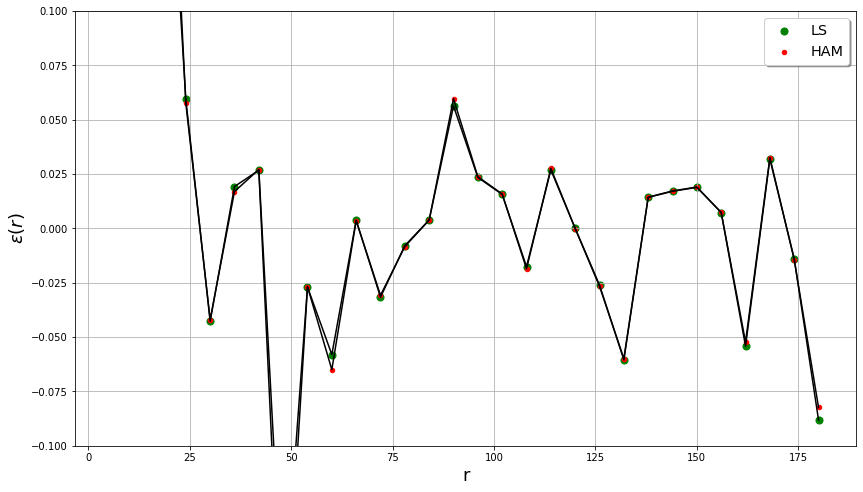

In [44]:
#Graficando r y sus estimadores LS y HAM

fig = plt.figure(figsize=(14,8))
plt.scatter(r[1:],epsilon_LS, s=50, c='g',label='LS')
plt.scatter(r[1:],epsilon_HAM, s=20, c='r',label='HAM')
plt.plot(r[1:],epsilon_LS,'k-')
plt.plot(r[1:],epsilon_HAM,'k-')
plt.ylim(-0.1,0.1)
plt.xlabel('r',fontsize=18)
plt.ylabel('$\epsilon(r)$',fontsize=18)
plt.legend(shadow=True, fontsize='x-large')
plt.grid();